## Using command line to conduct pdf fitting by a pdfgui project (.ddp) file 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from diffpy.pdfgui.tui import LoadProject

In [2]:
%matplotlib widget
plt.close('all')

### List ddp files

In [3]:
cl_ddp = '/Users/chenghunglin/Documents/20220329_XPD_DSE/CsPbCl3Fits.ddp'
io_ddp = '/Users/chenghunglin/Documents/20220329_XPD_DSE/VCMFitsTwoPhase(Sol) (Final).ddp'

### Load ddp file into pdfgui

In [4]:
cl_prj = LoadProject(filename=cl_ddp)

In [5]:
cl_prj.getDataSets()

In [6]:
cl_prj.getFits()

In [7]:
# https://github.com/diffpy/diffpy.pdfgui/blob/main/src/diffpy/pdfgui/control/pdfdataset.py
# class PDFDataSet(PDFComponent):
#     """PDFDataSet is a class for experimental PDF data.

#     Data members:
#         robs       -- list of observed r points
#         Gobs       -- list of observed G values
#         drobs      -- list of standard deviations of robs
#         dGobs      -- list of standard deviations of Gobs
#         stype      -- scattering type, 'X' or 'N'
#         qmax       -- maximum value of Q in inverse Angstroms.  Termination
#                       ripples are neglected for qmax=0.
#         qdamp      -- specifies width of Gaussian damping factor in pdf_obs due
#                       to imperfect Q resolution
#         qbroad     -- quadratic peak broadening factor related to dataset
#         spdiameter -- particle diameter for shape damping function
#                       Note: This attribute was moved to PDFStructure.
#                       It is kept for backward compatibility when reading
#                       PDFgui project files.
#         dscale     -- scale factor of this dataset
#         rmin       -- same as robs[0]
#         rmax       -- same as robs[-1]
#         filename   -- set to absolute path after reading from file
#         metadata   -- dictionary for other experimental conditions, such as
#                       temperature or doping

#     Global member:
#         persistentItems -- list of attributes saved in project file
#         refinableVars   -- set (dict) of refinable variable names.
#     """

#     persistentItems = [ 'robs', 'Gobs', 'drobs', 'dGobs', 'stype', 'qmax',
#                      'qdamp', 'qbroad', 'dscale', 'rmin', 'rmax', 'metadata' ]
#     refinableVars = dict.fromkeys(('qdamp', 'qbroad', 'dscale'))

In [8]:
# https://github.com/diffpy/diffpy.pdfgui/blob/84234ffe4cfa6959c2329bc9eb3914fb77477a86/src/diffpy/pdfgui/control/fitdataset.py
# class FitDataSet(PDFDataSet):
#     """FitDataSet stores experimental and calculated PDF data and related
#     fitting parameters.  Inherited from PDFDataSet.

#     Data members (in addition to those in PDFDataSet):

#     fitrmin     -- lower boundary for data fitting, property
#     fitrmax     -- upper boundary for data fitting, property
#     fitrstep    -- r-step used for fitted data, property
#     constraints -- dictionary of { var_string : Constraint_instance }
#     initial     -- dictionary of initial values of refinable variables
#     refined     -- dictionary of refined values of refinable variables

#     Calculated members:

#     rcalc       -- list of r points where Gcalc is calculated, cached property
#     Gcalc       -- list of calculated G values, cached property
#     dGcalc      -- list of standard deviations of Gcalc, cached property
#     Gtrunc      -- Gobs resampled to rcalc grid, cached property
#     dGtrunc     -- dGobs resampled to rcalc grid, cached property
#     Gdiff       -- difference curve, Gdiff = Gtrunc - Gcalc, property
#     crw         -- cumulative rw of the fit

#     The data in rcalc, Gcalc, dGcalc, Gtrunc, dGtrunc are recalculated
#     and cached when r-sampling changes.  Any change to fitrmin,
#     fitrmax and fitrstep sets the _rcalc_changed flag.

#     Refinable variables:  qdamp, qbroad, dscale
#     Note: self.refvar is the same as self.initial[refvar].

#     Class data:

#     persistentItems -- list of attributes saved in project file
#     """

#     persistentItems = [ 'rcalc', 'Gcalc', 'dGcalc',
#                         'fitrmin', 'fitrmax', 'fitrstep',
#                         'initial', 'refined' ]

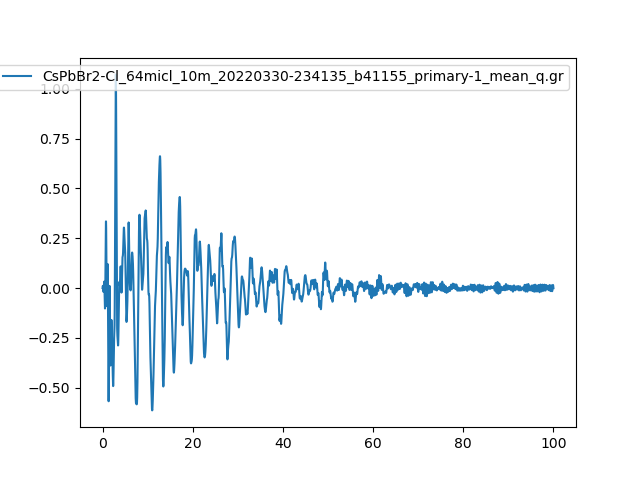

In [9]:
data_Cl_64 = cl_prj.getDataSets()[-1]
plt.figure()
plt.plot(data_Cl_64.robs, data_Cl_64.Gobs, label=data_Cl_64.name)
plt.legend()

In [10]:
fitting_Cl_64 = cl_prj.getFits()[-1]
fitting_Cl_64.strucs

[[Cs   0.060163 0.750000 0.019452 1.0000,
  Cs   0.939837 0.250000 0.980548 1.0000,
  Cs   0.439837 0.250000 0.519452 1.0000,
  Cs   0.560163 0.750000 0.480548 1.0000,
  Pb   0.000000 0.000000 0.500000 1.0000,
  Pb   0.500000 0.000000 0.000000 1.0000,
  Pb   0.500000 0.500000 0.000000 1.0000,
  Pb   0.000000 0.500000 0.500000 1.0000,
  Br   0.201022 0.031701 0.802792 1.0000,
  Br   0.798978 0.968299 0.197208 1.0000,
  Br   0.298978 0.968299 0.302792 1.0000,
  Br   0.701022 0.031701 0.697208 1.0000,
  Br   0.701022 0.468299 0.697208 1.0000,
  Br   0.298978 0.531701 0.302792 1.0000,
  Br   0.798978 0.531701 0.197208 1.0000,
  Br   0.201022 0.468299 0.802792 1.0000,
  Br   0.006259 0.250000 0.440335 1.0000,
  Br   0.993741 0.750000 0.559665 1.0000,
  Br   0.493741 0.750000 0.940335 1.0000,
  Br   0.506259 0.250000 0.059665 1.0000],
 [Cs   0.000000 0.000000 0.000000 1.0000,
  Pb   0.500000 0.500000 0.500000 1.0000,
  Cl   0.000000 0.500000 0.500000 1.0000,
  Cl   0.500000 0.000000 0.500000

In [11]:
fitting_Cl_64

In [12]:
data_Cl_64

In [13]:
fitting_Cl_64.getStructure(0)

[Cs   0.060163 0.750000 0.019452 1.0000,
 Cs   0.939837 0.250000 0.980548 1.0000,
 Cs   0.439837 0.250000 0.519452 1.0000,
 Cs   0.560163 0.750000 0.480548 1.0000,
 Pb   0.000000 0.000000 0.500000 1.0000,
 Pb   0.500000 0.000000 0.000000 1.0000,
 Pb   0.500000 0.500000 0.000000 1.0000,
 Pb   0.000000 0.500000 0.500000 1.0000,
 Br   0.201022 0.031701 0.802792 1.0000,
 Br   0.798978 0.968299 0.197208 1.0000,
 Br   0.298978 0.968299 0.302792 1.0000,
 Br   0.701022 0.031701 0.697208 1.0000,
 Br   0.701022 0.468299 0.697208 1.0000,
 Br   0.298978 0.531701 0.302792 1.0000,
 Br   0.798978 0.531701 0.197208 1.0000,
 Br   0.201022 0.468299 0.802792 1.0000,
 Br   0.006259 0.250000 0.440335 1.0000,
 Br   0.993741 0.750000 0.559665 1.0000,
 Br   0.493741 0.750000 0.940335 1.0000,
 Br   0.506259 0.250000 0.059665 1.0000]

### Start fitting based on diffpy.pdfgui.control.fitting.Fitting object

In [14]:
data_Cl_64._fitrmax

60.0

In [15]:
data_Cl_64._fitrmax = 90
data_Cl_64._updateRcalcRange()

In [16]:
fitting_Cl_64.start()


******************************************************************************
*                      P D F F I T   Version   1.4.3                         *
*                                              2024-01-13                    *
* -------------------------------------------------------------------------- *
* (c) 1998-2007 Trustees of the Michigan State University.                   *
* (c) 2008-2024 Trustees of the Columbia University                          *
*               in the city of New York.                                     *
*                                                                            *
* Authors:                                                                   *
*     Thomas Proffen        -   Email: tproffen@lanl.gov                     *
*     Jacques Bloch         -   Email: bloch@pa.msu.edu                      *
*     Christopher Farrow    -   Email: clf2121@columbia.edu                  *
*     Pavol Juhas           -   Email: pjuhas@bnl.g

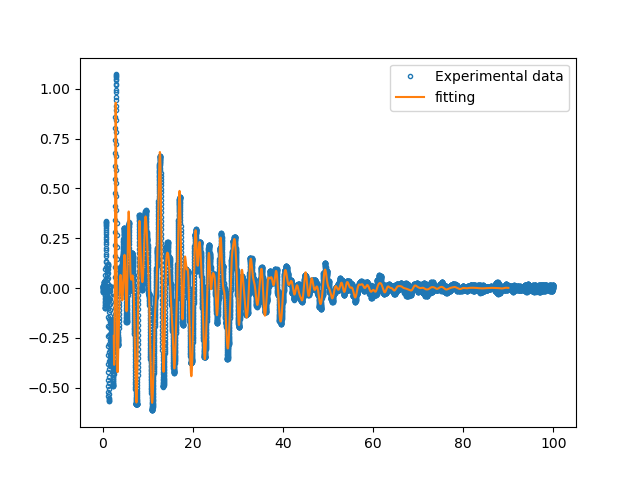

In [17]:
plt.figure()
plt.plot(data_Cl_64.robs, data_Cl_64.Gobs, '.', mfc='none', label='Experimental data')
plt.plot(data_Cl_64.rcalc, data_Cl_64.Gcalc, label='fitting')
plt.legend()